# Lab 1 Toering

In the computer labs we will work with the Python programming language within a Jupyter notebook. Each week a new notebook is made available that contains the exercises that are to be handed-in. 

* It is expected that you work individually and the usual plagarism rules apply.
* Submissions are to be made on canvas. Make sure that you add your student ID in the submission comments.
* The main notebook file you submit should read "Lab[number]_[last name].ipynb", for example "Lab2_Bongers.ipynb". 
* Please make sure your code will run without problems

_You need to fill in everywhere that there is a_ '__TODO__'

Feel free ask any questions during the computer lab sessions, or email the TA.

**The due date for the labs is next Wednesday at 23:59**

In [165]:
# Load the numpy numerical computation library
import numpy as np

# Load matplotlib, which controls plotting pretty graphs
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

In this exercise, we will perform the same computations as in Problem 4 from Homework 1, herein refered to as Problem 1.4. 

### Matrix-vector products: 
__TODO__ (0.5 pt) Write a function `same_size(A,B)` that given an array $\mathbf{A}$ and a vector $\mathbf{b}$ determines whether the product $\mathbf{A} \mathbf{b}$ is well-defined. The function should check that the number of columns of $\mathbf{A}$ equals the number of rows of $\mathbf{b}$ returning `True` or `False` accordingly.

We will use the python library `numpy`, which is designed to perfom matrix computations. Recall that in `numpy`, there is a function `shape` that given an array returns a tuple $(m,n,...)$, where $m$ is number of rows, $n$ is number of columns etc. 

In [191]:
def same_size(A,B):
    if A.shape[1] == B.shape[0]:
        return True
    else:
        return False
    
same_size(np.array([[1,2],[3,4]]),np.array([[1],[2]]))

True

__TODO__ Now we define $\mathbf{A}$ and $\mathbf{b}$ as in Homework problem 4 and check that our function indeed says that the product $\mathbf{A}\mathbf{b}$ is well-defined.  

In [192]:
list_A = [[1, 2],[3, 4]]
A = np.array(list_A)

list_b = [5, 6]
b = np.array(list_b)
b = b.reshape((2,1))

print(same_size(A,b))

True


__TODO__ (0.25 pt) Now give an example where `same_size()` would return the value `False`.

In [193]:
same_size(np.array([[1,2],[3,4]]),np.array([[1,2]]))

False

__TODO__ (1 pt) Now write a function `product(A,B)` that computes the matrix-matrix product $\mathbf{A} \mathbf{B}$. The function should first call `same_size()` to check whether $\mathbf{A} \mathbf{B}$ is well-defined. If the product is not well-defined, `product()` should return False; otherwise, returning the result $\mathbf{A} \mathbf{B}$.

For this exercise you may not use pre-existing numpy functions. You must implement the formula $(\mathbf{A} \mathbf{B})_{ij} = \sum_{l=1}^m A_{il} B_{lj} $ (if $\mathbf{A}$ is an array of size $(n,k)$ and $\mathbf{B}$ is an array of size $(k,m)$). 

In [196]:
def product(A,B):
    if same_size(A,B):
        (n,k) = A.shape
        (k,m) = B.shape
        AB = np.empty([n,m])
        for i in range(n):
            for j in range(m):
                AB[i][j] = np.sum(A[i,:]*B[:,j])
        return AB              
        
    return False


print(product(A,b))

print(product(np.array([[1,2],[3,4],[1,1]]),np.array([[1],[2]])))

[[17.]
 [39.]]
[[ 5.]
 [11.]
 [ 3.]]


Let us now use `product()` to solve Problem 1.4.2. 

__TODO__ Compute the product $\mathbf{b}^T \mathbf{A}$. Check that the answer is the same as the one you found in your written assignment.

In [198]:
print(product(b.T,A))

[[23. 34.]]


To define `product()`, you were asked to not use any built-in functions. There is however already a function in numpy that computes the product of 2 matrices. 

__TODO__ (0.25 pt) Find that function in the library and use it to compute the product  $\mathbf{b}^T \mathbf{A}$. You should find the same answer as the one you obtained using your own function `product()`.

In [199]:
print(np.matmul(b.T,A))

[[23 34]]


You will now write a function that computes the inverse of an array $\mathbf{A}$ of size $(2,2)$. You may not use any pre-existing inverse functions from any libraries, but instead use the definition $$\begin{bmatrix} a & b \\ c & d \end{bmatrix} = \text{det}(\mathbf{A})^{-1} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}.$$

__TODO__ (1 pt)  First write a function `determinant(A)` that given an array $\mathbf{A}$ of size $(2,2)$ returns the determinant of $\mathbf{A}$. Recall that $\text{det}\left(\begin{bmatrix} a & b \\ c & d \end{bmatrix}\right)=ad - bc$.

In [201]:
def determinant(matrix):
    (x,y) = matrix.shape
    return matrix[0,0]*matrix[x-1,y-1]-matrix[0,y-1]*matrix[x-1,0]


print(determinant(A))

-2


__TODO__ (0.25 pt) In the library `numpy.linalg`, there is an already built-in function that computes the determinant. Use that function to compute the determinant of $\mathbf{A}$ and check that you obtained the same result as with your own function `determinant(A)`. 

In [202]:
print(np.linalg.det(A))

-2.0000000000000004


__TODO__ (1 pt) Now use `determinant()` to define the function `inverse(A)`.

In [203]:
def inverse(matrix):
    (x,y) = matrix.shape
    term = 1/determinant(matrix)
    return term*np.array([[matrix[x-1,y-1],-matrix[0,y-1]],[-matrix[x-1,0],matrix[0,0]]])

__TODO__ Let us use this function to calculate $\mathbf{A}^{-1}$ as in Problem 1.4. Compare this answer with the answer from your written assignement. 

In [204]:
print(inverse(A))

[[-2.   1. ]
 [ 1.5 -0.5]]


In `numpy`, there is also a function that directly calculates the inverse of an array [`np.linalg.inv`] (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html)

__TODO__ (0.25 pt) Print the inverse of $\mathbf{A}$ using the inverse function. Check that this is equal to your previous result.

In [176]:
print(np.linalg.inv(A))

[[-2.   1. ]
 [ 1.5 -0.5]]


__BONUS__ (1 pt) Below there are 2 functions `matching` and `matching_bis` that check whether the inverse of $\mathbf{A}$ calculated using `np.linalg.inv()` is equal to your own `inverse()`. The functions return `1` if the 2 matrices are equal and `0` otherwise. Can you guess why the first function returns $0$ d the second function returns a $1$ even though the 2 matrices are equal? 

In [205]:
A1 = inverse(A)
A2 = np.linalg.inv(A)

def matching(A1,A2):
    print(np.prod(np.equal(A1,A2)))
    
def matching_bis(A1,A2):
    print(np.prod(np.isclose(A1,A2)))
    
matching(A1,A2)
matching_bis(A1,A2)

0
1


In [227]:
# I suspect it has something to do with floats and the rounding
# errors that occur

Finally in Problem 1.4.4, you had to calculate $\mathbf{A}^{-1}\mathbf{b}$.

__TODO__ Use your functions `inverse()` and `product()` to compute $\mathbf{A}^{-1}\mathbf{b}$. You can check that this matches your answer from the written assignment.

In [228]:
print(product(inverse(A),b))

[[-4. ]
 [ 4.5]]


__TODO__ (0.5 pt) Now try this for the matrix $\mathbf{A} = \begin{bmatrix} 3 & 6 \\ 2 & 4 \end{bmatrix}$. Why do you get this result? Write your answer as a comment in the code.

In [229]:
A = np.asarray([[3,6],[2,4]])
print(product(inverse(A),b))

# This result is due to no inverse existing for this matrix

[[nan]
 [nan]]


/home/martine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/martine/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


## Exercise 2
This exercise is based on the hard drive example in the Week 1 notes.

You are given a binary input string of length $n$. The probability of a particular bit $X$ being 0 is $P(X=0) = p$ (clearly $P(X=1)=1-p$). This string is read by a machine which is prone to read-errors. If $Y$ denotes the bit read (after errors), then with a probability $P(Y=1 | X=0)=p_{0\to 1}$, the machine reads a $0$ instead of a $1$ and with a probability $P(Y=0 | X=1)=p_{1\to 0}$, it reads a $1$ as a $0$. We call $X$ the __input__ and $Y$ the __output__.

Using the sum and product rules and knowing the values $p$, $p_{0\to1}$ and $p_{1\to0}$, we can calculate theoretically the marginal $P(Y=0)$. Say we did not know $p_{0_\to1}$ or $p_{1\to0}$, however, but were given a string output by the machine, we could still estimate $P(Y=0)$. Namely, given a length $n$ output, containing $k$ zero bits, then we would estimate $P(Y=0) = k/ n$. We denote this simulated estimate as $\hat{P}(Y=0)$.

The goal of this exercise is to calculate theoretically the marginal $P(Y=0)$ and to compare it with a simulated version $\hat{P}(Y=0)$. Then we will represent graphically those values to see how much they differ. Finally we will graphically represent how the difference between the simulated estimate and the real value $P(Y=0)$ evolves, as $n$ becomes bigger and bigger.

### Generating the input
You will now randomly generate the input for the machine. You need to write a function `sample(n,p)` that returns a length $n$ random binary string, where the probability that any bit is $0$ is $p$.

In order to help you, we provide you with a function `sample_bit(p)` which generates a $0$ or a $1$ with probability $p$.

In [231]:
def sample_bit(p):
    if np.random.rand() < p: return 0
    else: return 1    


__TODO__ (0.5 pt) Explain what the function `np.random.rand()` does and why the function `sample_bit()` indeed returns a $0$ with probability $p$. Write you answer as a comment in the below below.

In [235]:
# The function random.rand creates an array of random numbers 
# from a uniform distribution between 0 and 1, only 0 included. 
# If there are no arguments provided, the function simply 
# returns one value from that distribution 

__TODO__ (1 pt) Now using  `sample_bit`(), write the function `sample(n,p)` (as defined earlier). Next, call the function with the values $n=100$ and $p=0.2$ and print the result.

In [239]:
# I included a boolean argument string_mode, if set True the output is a string,
# if set False the output is a list
def sample(n,p,string_mode):
    binary_values = []
    for i in range(n):
        binary_values.append(sample_bit(p))
    if string_mode == True:
        binary_string = ''.join(str(value) for value in binary_values)
        return binary_string
    return binary_values
    
s = sample(100,0.2,True)
print(s)

1000111101111111111111110111110111110110111011111110101111111111101111101111110101111011111111111110


### Generating an output

Given the input for the machine, we now generate outputs. We define a function `transform_sample(s,p00,p11)` where `s` is a length $n$ string input for the machine, $\texttt{p00} = p_{0\to0}$ is the probability that the machines recognizes a $0$ as a $0$ and $\texttt{p11} = p_{1\to1}$ is the probability that the machine recognizes a $1$ as a $1$. The output of the function is also a length $n$ string. 

__TODO__ (1 pt) Complete `transform_sample(s, p00, p11)` so that when the machine reads a $0$ in $s$, it should transforms it into a $1$ with probability $1-p_{0\to0}$ etc.

Finally you should call `transform_sample(s,p00,p11)` with the values $p_{0\to0}=0.8$, $p_{1\to1}=0.9$.

In [242]:
def transform_sample(s,p00,p11,string_mode):
    output_values = []
    for value in s:
        if value == 0:
            if np.random.rand() < p00:
                output_values.append(value)
            else:
                output_values.append(1)
        else:
            if np.random.rand() < p11:
                output_values.append(value)
            else:
                output_values.append(0)
    if string_mode == True:
        output_string = ''.join(str(value) for value in output_values)
        return output_string
    return output_values
            

t = transform_sample(s,0.8,0.9,True)
print(t)        

1000111101111111111111110110110111110110111011111110101101111111101111101111010101111001111110111110


### Computing the marginal estimate $\hat{P}(Y=0)$

__TODO__ (0.5 pt) Given a length $n$ output, we can estimate the probabiliity that any bit is a $0$. This is simply $\hat{P}(Y=0) = k / n$, where $k$ is the number of $0$ occurring in the output. Write a function `marginal_estimate(t)` which given a string `t`, returns $\hat{P}(Y=0)$.  

In [289]:
def marginal_estimate(t,string_mode):
    if len(t)>0:
        if string_mode == True:
            return t.count('0')/len(t)
        else:
            return t.count(0)/len(t)
    else:
        return t
    
est = marginal_estimate(t,True)
print(est)

0.22


### Theoretical computation of the true marginal $P(Y=0)$

__TODO__ (0.5 pt)  Given $p$, $p_{0\to0}$ and $p_{1\to1}$, we can calculate the marginal $P(Y=0)$ exactly. Construct a function `marginal_theory(p,p00,p11)` that given $p$, $p_{0\to0}$ and $p_{1\to1}$, returns the probability that the machine returns a $0$.

Use that function to compute that probability in the case where $p=0.2$, $p_{0\to0}=0.8$ and $p_{1\to1}=0.9$. Recall that the law of total probability is

$
P(A) = P(A |B) P(B) + P(A |B^c) P(B^c)
$

In [290]:
def marginal_theory(p,p00,p11):
    return p00*p+(1-p11)*(1-p)

new_p = marginal_theory(0.2,0.8,0.9)
print(new_p)

0.24000000000000002


### Draw histogram to compare the two marginals

We draw now two histograms, the first one to illustrate the theoretical probability $P(Y=0)$ and the second one to illustrate the simulated probability based on `t`. 

In the first histogram, the value $0$ should be mapped to the probability  $P(Y=0)$ computed with the function `marginal_theory()` and the value $1$ to $1 - P(Y=0)$. In the second histogram, $0$ should be mapped to the estimated marginal $\hat{P}(Y=0)$ computed with the function `marginal_estimate()` etc.

__TODO__ (0.5 pt) Draw the two histograms on top of each other and use the parameter `alpha` from the `plt.hist()` function, in order to make the histograms semi-transparent.

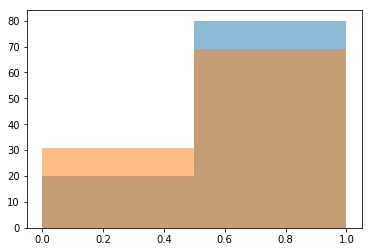

In [291]:
s_list = sample(100,0.2,False)
t_list = transform_sample(s_new,0.8,0.9,False)

plt.hist(s_list,2,alpha=0.5,range=(0,1))
plt.hist(t_list,2,alpha=0.5,range=(0,1))
plt.show()

### Evolution of the simulation as $n$ grows

We would expect that as $n$ grows, the marginal estimate $\hat{P}(Y=0)$ should get closer to the true value. 

You will graph out the different values of the estimate for different values of $n$. For each value of $n \in \{1,2,...,N\}$, we will generate $m$ different estimates based on the length $n$ output. All of these estimates will be represented in the graph and we will then see how those evolve as $n$ gets bigger.

__TODO__ (1 pt) Define a function `graph(m,N,p,p00,p11)` that draws two overlaid graphs (use a different color for each graph). The domain of both graphs is `np.arange(1,N+1)`. Intuitively, each $n$ in the domain will specify the size of the string that we are using for $\hat{P}(Y=0)$. The first graph should be a constant function displaying the value $P(Y=0)$ computed by `marginal_theory()`. The second graph should show the output of `compute_marginal()` for each value $n$. The probabilities `p`, `p00` and `p11` have the same interpretations as before. What do you notice?

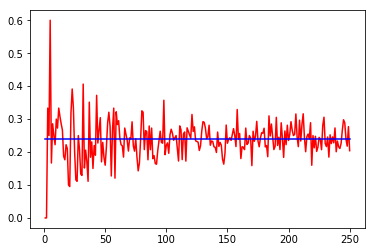

In [300]:
def graph(m,N,p,p00,p11):
    list1=[]
    list2=[]
    for i in range(1,N+1):
        sampl = sample(i,p,False)
        transformed = transform_sample(sampl,p00,p11,False)
        var1 = marginal_estimate(transformed, False)
        var2 = marginal_theory(p,p00,p11)
        list1.append(var1)
        list2.append(var2)
    plt.plot(np.arange(1,N+1),list1,color='red')
    plt.plot(np.arange(1,N+1),list2,color='blue')
    plt.show()

m = 20
N = 250
p = 0.2
p00 = 0.8
p11 = 0.9

graph(m,N,p,p00,p11)

# What is noticable is that as the length of the output grows, the marginal estimation
# is able to estimate better and closer to the real marginal computed with marginal theory